In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
from matplotlib.image import imread

In [7]:
train_path = 'C:\\Users\\Ufuk Altan\\Downloads\\Downloads\\Data Science\\cell_images\\train\\'
test_path = 'C:\\Users\\Ufuk Altan\\Downloads\\Downloads\\Data Science\\cell_images\\test\\'

In [8]:
import os

In [7]:
os.listdir(train_path + 'parasitized')

['C100P61ThinF_IMG_20150918_144104_cell_162.png',
 'C100P61ThinF_IMG_20150918_144104_cell_163.png',
 'C100P61ThinF_IMG_20150918_144104_cell_164.png',
 'C100P61ThinF_IMG_20150918_144104_cell_165.png',
 'C100P61ThinF_IMG_20150918_144104_cell_166.png',
 'C100P61ThinF_IMG_20150918_144104_cell_167.png',
 'C100P61ThinF_IMG_20150918_144104_cell_168.png',
 'C100P61ThinF_IMG_20150918_144104_cell_169.png',
 'C100P61ThinF_IMG_20150918_144104_cell_170.png',
 'C100P61ThinF_IMG_20150918_144104_cell_171.png',
 'C100P61ThinF_IMG_20150918_144348_cell_138.png',
 'C100P61ThinF_IMG_20150918_144348_cell_139.png',
 'C100P61ThinF_IMG_20150918_144348_cell_140.png',
 'C100P61ThinF_IMG_20150918_144348_cell_141.png',
 'C100P61ThinF_IMG_20150918_144348_cell_142.png',
 'C100P61ThinF_IMG_20150918_144348_cell_143.png',
 'C100P61ThinF_IMG_20150918_144823_cell_157.png',
 'C100P61ThinF_IMG_20150918_144823_cell_158.png',
 'C100P61ThinF_IMG_20150918_144823_cell_159.png',
 'C100P61ThinF_IMG_20150918_144823_cell_160.png',


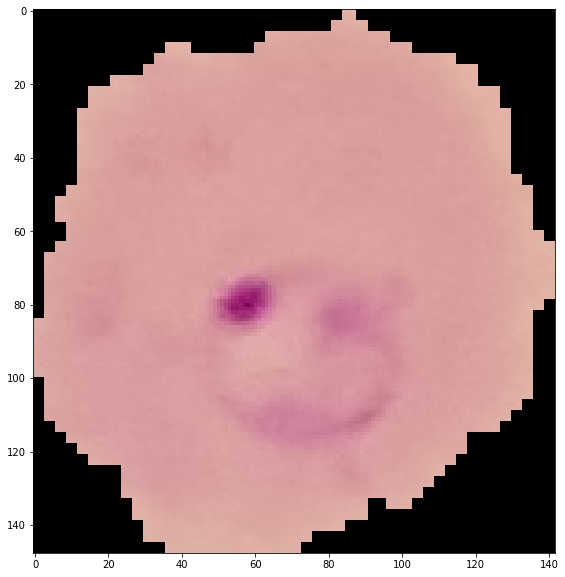

In [11]:
plt.figure(figsize=(20,10))
plt.imshow(imread(train_path + 'parasitized\\' + 'C100P61ThinF_IMG_20150918_144104_cell_162.png'))

In [17]:
os.listdir(train_path + 'uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

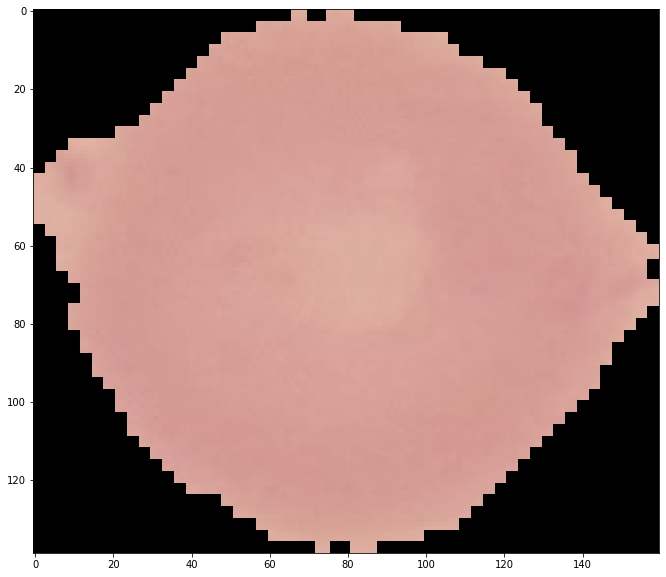

In [14]:
plt.figure(figsize=(20,10))
plt.imshow(imread(train_path + 'uninfected\\' + 'C100P61ThinF_IMG_20150918_144104_cell_128.png'))

In [15]:
len(os.listdir(train_path + 'uninfected'))

12480

In [16]:
len(os.listdir(train_path + 'parasitized'))

12480

In [25]:
img_parasitized=imread(train_path + 'parasitized\\' + 'C100P61ThinF_IMG_20150918_144104_cell_162.png')

In [20]:
dim1 = []
dim2 = []

for image in os.listdir(train_path+'uninfected'):
    
    img = imread(train_path+'uninfected\\' + image)
    d1,d2,color = img.shape
    dim1.append(d1)
    dim2.append(d2)
    

131.4041990544114

In [26]:
np.median(dim1)

130.0

In [25]:
np.median(dim2)

130.0

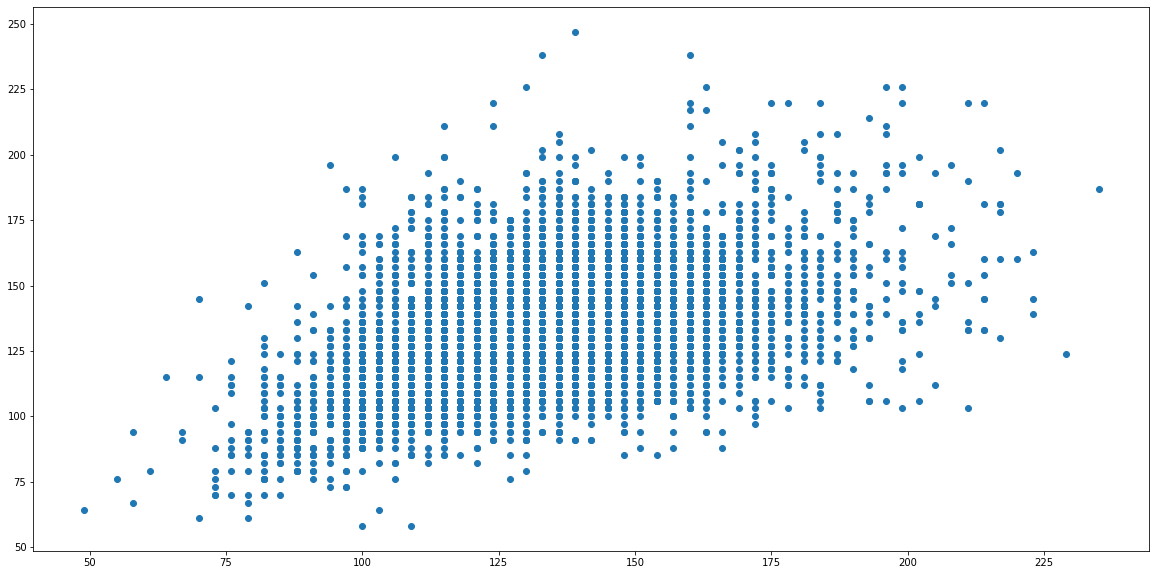

In [21]:
plt.figure(figsize=(20,10))
plt.scatter(dim1,dim2)

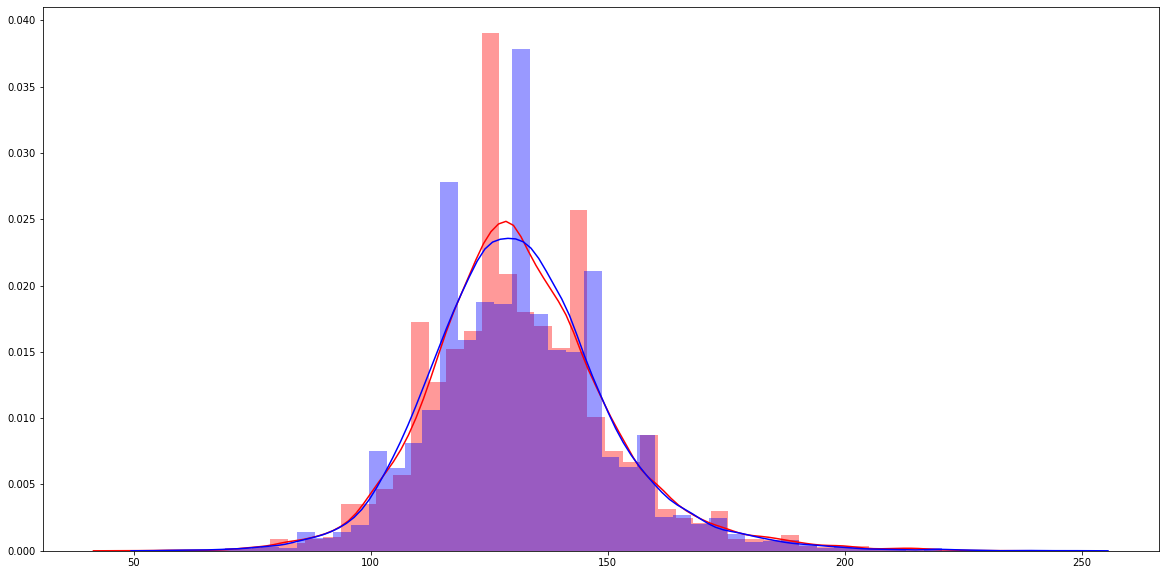

In [28]:
plt.figure(figsize=(20,10))
sns.distplot(dim1, color='r')
sns.distplot(dim2, color='b')

In [13]:
image_shape= (130,130,3)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [36]:
img_parasitized.max() #Already rescaled !!!!!

0.9098039

In [10]:
image_gen = ImageDataGenerator(rotation_range=45,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')

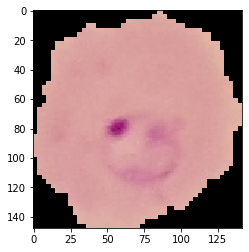

In [37]:
plt.imshow(img_parasitized)

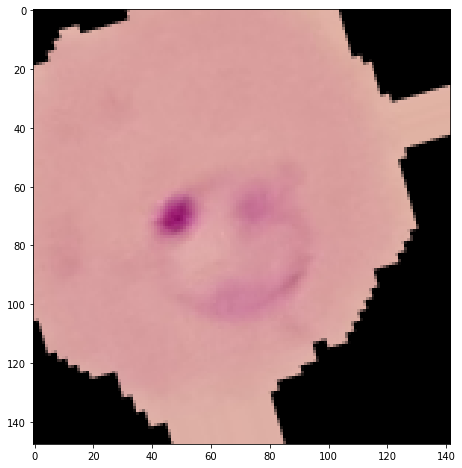

In [41]:
plt.figure(figsize=(12,8))
plt.imshow(image_gen.random_transform(img_parasitized))

In [11]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten,Activation, Dropout

In [44]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = image_shape))
model.add(Activation('relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [45]:
model.compile(loss='binary_crossentropy', optimizer ='adam', metrics =['accuracy'])

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 62, 62, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 64)        0

In [14]:
train_image = image_gen.flow_from_directory(train_path,
                                            target_size= image_shape[:2],
                                            color_mode='rgb',
                                            batch_size=16,
                                            class_mode='binary')

test_image = image_gen.flow_from_directory(test_path,
                                            target_size= image_shape[:2],
                                            color_mode='rgb',
                                            batch_size=16,
                                            class_mode='binary',
                                            shuffle=False)

Found 24958 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


In [15]:
train_image.class_indices

{'parasitized': 0, 'uninfected': 1}

In [50]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', mode ='min', verbose= 1, patience=10)

In [ ]:
result = model.fit(train_image,epochs=2,
                  validation_data=test_image,
                  callbacks=[early_stop])

In [1]:
from tensorflow.keras.models import load_model

In [3]:
malaria_model = load_model('malaria_detector.h5')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [16]:
malaria_model.evaluate_generator(test_image)

[2.579557692527805, 0.8280769]

In [17]:
malaria_model.metrics_names

['loss', 'accuracy']

In [18]:
pred = malaria_model.predict_generator(test_image)
predictions = pred > 0.5

In [19]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
test_image.classes

array([0, 0, 0, ..., 1, 1, 1])

In [23]:
print(classification_report(test_image.classes,predictions))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86      1300
           1       0.98      0.68      0.80      1300

    accuracy                           0.83      2600
   macro avg       0.87      0.83      0.83      2600
weighted avg       0.87      0.83      0.83      2600



In [24]:
confusion_matrix(test_image.classes,predictions)

array([[1278,   22],
       [ 411,  889]], dtype=int64)

In [26]:
img_parasitized

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)